# Youtube Adview Prediction

## Import Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

## Looking Into Basic Information of Data

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [4]:
data.shape

(14999, 9)

In [5]:
data.size

134991

In [6]:
data.columns

Index(['vidid', 'adview', 'views', 'likes', 'dislikes', 'comment', 'published',
       'duration', 'category'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   vidid      14999 non-null  object
 1   adview     14999 non-null  int64 
 2   views      14999 non-null  object
 3   likes      14999 non-null  object
 4   dislikes   14999 non-null  object
 5   comment    14999 non-null  object
 6   published  14999 non-null  object
 7   duration   14999 non-null  object
 8   category   14999 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.0+ MB


In [8]:
data.describe(include = "all")

,vidid,adview,views,likes,dislikes,comment,published,duration,category
count,14999,1.499900e+04,14999,14999,14999,14999,14999,14999,14999
unique,14999,NaN,14588,4789,1546,2007,2386,3146,8
top,VID_18655,NaN,885,1,0,0,2016-08-26,PT31S,D
freq,1,NaN,4,174,1091,1290,42,147,7558
mean,NaN,2.107791e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,5.237711e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,6.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning

### Checking for missing values and removing if present.

In [9]:
data.isnull().any()

vidid        False
adview       False
views        False
likes        False
dislikes     False
comment      False
published    False
duration     False
category     False
dtype: bool

In [10]:
data.isnull().sum()

vidid        0
adview       0
views        0
likes        0
dislikes     0
comment      0
published    0
duration     0
category     0
dtype: int64

In [11]:
# Lets plot the missing values

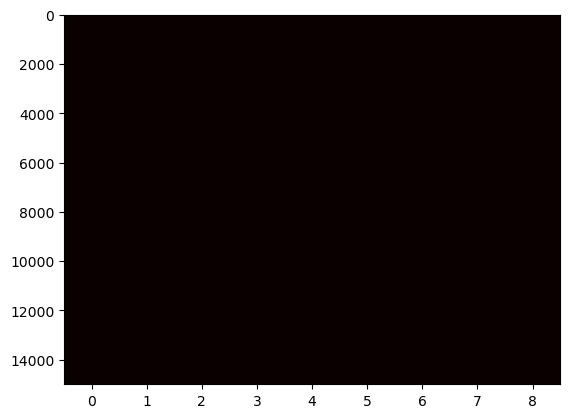

In [12]:
plt.imshow(data.isnull(), cmap='hot', aspect='auto')
plt.show()

In [13]:
# So, there are no null values present in our data.

### Convert Categorical Columns into Numerical Columns

In [14]:
# Removing the character F present in the data.
data = data[data['views'] != 'F' ]
data = data[data['likes'] != 'F' ]
data = data[data['dislikes'] != 'F' ]
data = data[data['comment'] != 'F' ]

In [15]:
# Converting features with object data type into numeric.
data['views'] = pd.to_numeric(data['views'])
data['likes'] = pd.to_numeric(data['likes'])
data['dislikes'] = pd.to_numeric(data['dislikes'])
data['comment'] = pd.to_numeric(data['comment'])

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14637 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   vidid      14637 non-null  object
 1   adview     14637 non-null  int64 
 2   views      14637 non-null  int64 
 3   likes      14637 non-null  int64 
 4   dislikes   14637 non-null  int64 
 5   comment    14637 non-null  int64 
 6   published  14637 non-null  object
 7   duration   14637 non-null  object
 8   category   14637 non-null  object
dtypes: int64(5), object(4)
memory usage: 1.1+ MB


Checking for missing values and removing if present.

### Converting Duration Column into Seconds

In [17]:
import datetime
import time

In [18]:
def checki(x):
    y = x[2:]
    h = ''
    m = ''
    s = ''
    mm = ''
    P = ['H','M','S']
    for i in y:
        if i not in P:
            mm+=i
        else:
            if(i=="H"):
                h = mm
                mm = ''
            elif(i == "M"):
                m = mm
                mm = ''
            else:
                s = mm
                mm = ''
    if(h==''):
        h = '00'
    if(m == ''):
        m = '00'
    if(s==''):
        s='00'
    bp = h+':'+m+':'+s
    return bp

train=pd.read_csv("train.csv")
mp = pd.read_csv("train.csv")["duration"]
time = mp.apply(checki)

def func_sec(time_string):
    h, m, s = time_string.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

time1=time.apply(func_sec)
data["duration"]=time1
data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,457,F
1,VID_14135,2,1707,56,2,6,2016-10-01,570,D
2,VID_2187,1,2023,25,0,2,2016-07-02,136,C
3,VID_23096,6,620860,777,161,153,2016-07-27,262,H
4,VID_10175,1,666,1,0,0,2016-06-29,31,D


### Converting date to year format in published column

In [19]:
data['published'] = pd.DatetimeIndex(data['published']).year

# Converting published column to numerical column
data['published'] = data['published'].astype('int')

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14637 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   vidid      14637 non-null  object
 1   adview     14637 non-null  int64 
 2   views      14637 non-null  int64 
 3   likes      14637 non-null  int64 
 4   dislikes   14637 non-null  int64 
 5   comment    14637 non-null  int64 
 6   published  14637 non-null  int32 
 7   duration   14637 non-null  int64 
 8   category   14637 non-null  object
dtypes: int32(1), int64(6), object(2)
memory usage: 1.1+ MB


In [21]:
numerical_columns = data.select_dtypes(include=['number']).columns
categorical_columns = data.select_dtypes(exclude=['number']).columns

print('Number of numerical columns : ' + str(len(numerical_columns)))
print('Number of categorical columns: ' + str(len(categorical_columns)))

Number of numerical columns : 7
Number of categorical columns: 2


## Visualizing the data

In [22]:
data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016,457,F
1,VID_14135,2,1707,56,2,6,2016,570,D
2,VID_2187,1,2023,25,0,2,2016,136,C
3,VID_23096,6,620860,777,161,153,2016,262,H
4,VID_10175,1,666,1,0,0,2016,31,D


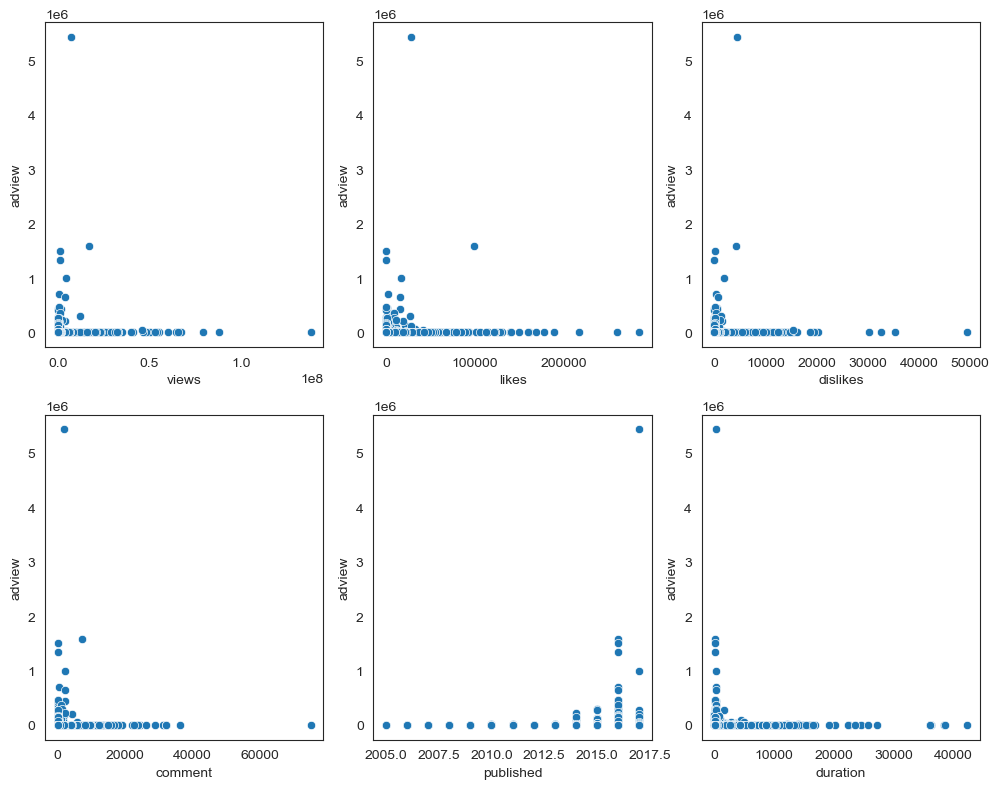

In [23]:

sns.set_style('white')
fig, axes = plt.subplots(2, 3 , figsize = (10,8))
sns.scatterplot(data=data, x='views', y='adview', ax=axes[0,0])
sns.scatterplot(data=data, x='likes', y='adview', ax=axes[0,1])
sns.scatterplot(data=data, x='dislikes', y='adview', ax=axes[0,2])
sns.scatterplot(data=data, x='comment', y='adview', ax=axes[1,0])
sns.scatterplot(data=data, x='published', y='adview', ax=axes[1,1])
sns.scatterplot(data=data, x='duration', y='adview', ax=axes[1,2])
plt.tight_layout()

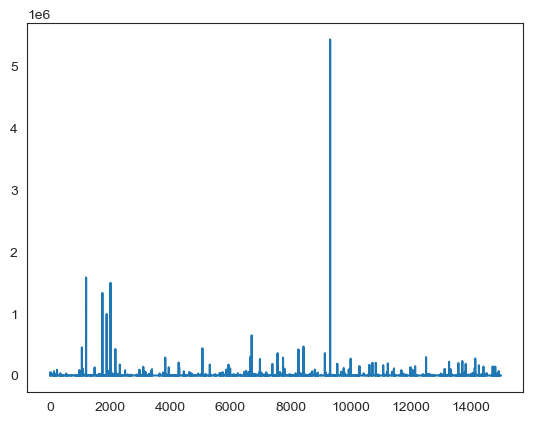

In [24]:
plt.plot(data['adview'])

<Axes: xlabel='category', ylabel='Count'>

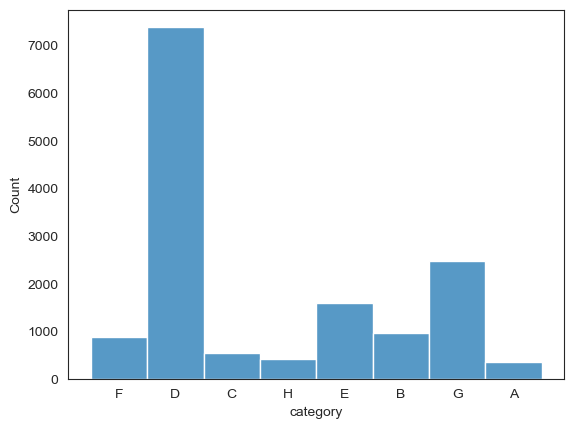

In [25]:
# Lets see distribution of category column:
sns.histplot(data['category'])

Text(0.5, 1.0, 'Data Correlation')

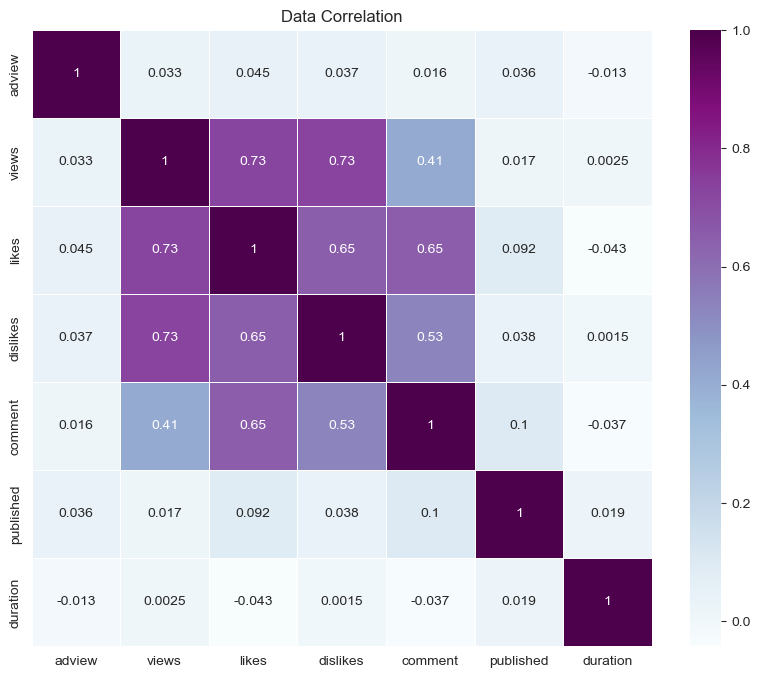

In [26]:
correlation_matrix = data.corr(numeric_only = True)

# Create a heatmap
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap="BuPu", linewidths=.5)
plt.title('Data Correlation')

## Feature Engineering

In [27]:
# Columns which are not neccessary can be removed

In [28]:
df = data.drop(['vidid', 'published', 'duration'], axis = 1)

In [29]:
df.head()

,adview,views,likes,dislikes,comment,category
0,40,1031602,8523,363,1095,F
1,2,1707,56,2,6,D
2,1,2023,25,0,2,C
3,6,620860,777,161,153,H
4,1,666,1,0,0,D


In [1]:
# If there are any Non-numerical labels should be converted into numericals before training a model. 

In [2]:
# This process can be done by using label encoder from data preprocessing.
# As we have labels in numerical form there is no need to use labelencoder

In [33]:
# Generate dummy columns:
# Here new columns are created for each category and old ones are deleted.
# get_dummies creates binary columns for each category.
# If a instance has category 'F' then category_F column value is 1 and remaining column values set to 0.
df = pd.get_dummies(df).reset_index(drop=True)
df

,adview,views,likes,dislikes,comment,category_A,category_B,category_C,category_D,category_E,category_F,category_G,category_H
0,40,1031602,8523,363,1095,0,0,0,0,0,1,0,0
1,2,1707,56,2,6,0,0,0,1,0,0,0,0
2,1,2023,25,0,2,0,0,1,0,0,0,0,0
3,6,620860,777,161,153,0,0,0,0,0,0,0,1
4,1,666,1,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14632,2,525949,1137,83,86,1,0,0,0,0,0,0,0
14633,1,665673,3849,156,569,0,0,0,1,0,0,0,0
14634,4,3479,16,1,1,0,1,0,0,0,0,0,0
14635,1,963,0,0,0,0,0,0,0,0,0,1,0


In [3]:
# Now categorical column is transformed into numericals. 

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14637 entries, 0 to 14636
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   adview      14637 non-null  int64
 1   views       14637 non-null  int64
 2   likes       14637 non-null  int64
 3   dislikes    14637 non-null  int64
 4   comment     14637 non-null  int64
 5   category_A  14637 non-null  uint8
 6   category_B  14637 non-null  uint8
 7   category_C  14637 non-null  uint8
 8   category_D  14637 non-null  uint8
 9   category_E  14637 non-null  uint8
 10  category_F  14637 non-null  uint8
 11  category_G  14637 non-null  uint8
 12  category_H  14637 non-null  uint8
dtypes: int64(5), uint8(8)
memory usage: 686.2 KB


## Splitting the dataset into Test and Train

In [45]:
from sklearn.model_selection import train_test_split

# input for the model will be views, likes, dislikes, and, category columns.
x = df.drop(['adview'] , axis = 1)

# The model should predict adview which is y
y = df['adview']


In [46]:
x.shape

(14637, 12)

In [47]:
y.shape

(14637,)

In [48]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.3 , random_state = 48)


In [49]:
x_train.shape

(10245, 12)

In [50]:
x_test.shape

(4392, 12)

In [51]:
y_train.shape

(10245,)

In [52]:
y_test.shape

(4392,)

#### Scaling features

In [57]:
# Now we have to normalise the data.

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

## Model Development

### Linear Regression

In [58]:
# Linear Regression:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(x_train , y_train)
prediction1 = linear_reg.predict(x_test)

### Support Vector Regression

In [59]:
# Support vector regression:
from sklearn.svm import SVR
sv_reg = SVR()
sv_reg.fit(x_train , y_train)
prediction2 = sv_reg.predict(x_test)

### Decision Tree Regressor

In [60]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
Dt_reg = DecisionTreeRegressor()
Dt_reg.fit(x_train, y_train)
prediction3 = Dt_reg.predict(x_test)

### Random Forest Regressor 

In [63]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
Rf_reg = RandomForestRegressor(n_estimators = 200  , random_state = 42 )
Rf_reg.fit(x_train , y_train)
prediction4 = Dt_reg.predict(x_test)

## Accuracy Check
- Evaluation metrics for Regression problems are :
    * mean_absolute_error
    * mean_squared_error
    * root_mean_squared_error

In [64]:
# Best model is selected based on the accuracy of predictions.

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


def accuracy_check(y_test , prediction , model):
    print(model,':')
    print('Mean Absolute Error : ' ,  mean_absolute_error(y_test, prediction))
    print('Mean Squared Error : ' , mean_squared_error(y_test, prediction))
    print('Root Mean Squared Error : ' , np.sqrt(mean_squared_error(y_test, prediction)))
    print()

accuracy_check(y_test , prediction1 , 'linear regression')
accuracy_check(y_test , prediction2 , 'support vector regression')
accuracy_check(y_test , prediction3 , 'decision tree regression')
accuracy_check(y_test , prediction4 , 'Random froest regression')

linear regression :
Mean Absolute Error :  3604.803887973459
Mean Squared Error :  659798344.3953929
Root Mean Squared Error :  25686.54014061436

support vector regression :
Mean Absolute Error :  1372.175694675267
Mean Squared Error :  640498095.7968979
Root Mean Squared Error :  25308.063849233862

decision tree regression :
Mean Absolute Error :  3696.215093854233
Mean Squared Error :  2285482093.169039
Root Mean Squared Error :  47806.71598393931

Random froest regression :
Mean Absolute Error :  3696.215093854233
Mean Squared Error :  2285482093.169039
Root Mean Squared Error :  47806.71598393931



### Picking the best model based on error

In [65]:
# With the least mea absolute error we can choose support vector regression model

In [66]:
# After selecting the best model we can save the model by using joblib package

### Save The Model Using Joblib

In [67]:
import joblib
joblib.dump(sv_reg, "supportvector_youtubeadview.pkl")

['supportvector_youtubeadview.pkl']

#### We can load the model anytime to predict on any test data

In [74]:
# Model can be loaded as:
model = joblib.load('supportvector_youtubeadview.pkl')

In [69]:
model

SVR()